# Baseball Case Study

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [165]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [166]:
#READ THE DATASET
df=pd.read_csv('C:/Users/HP/Desktop/data sets/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In this dataset we have to predict the no of wins for a given team in the 2015 season based on several different indicators of success from last year 2014 data.Here the target column is 'W'=Win,which is continuous in nature and thus this is a regression peoblem.Other independent features are continuous in nature and they are: 
W- Number of wins

R- Runs

AB- At Bats

H- Hits

2B- Doubles

3B- Triples

HR- Homeruns

BB- Walks

SO- Strikeouts

SB- Stolen Bases

RA- Runs Allowed

ER- Earned Runs

ERA-Earned Run Average

CG- Complete Games

SHO-Shutouts

SV- Saves

E- Errors

In [167]:
df.shape

(30, 17)

There are thirty columns and 17 rows in this dataset.One target variable W and the rest 16 are independent features related to baseball indicators of success.

In [168]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


There are thirty columns and 17 rows in this dataset.One target variable W and the rest 16 are independent features related to baseball indicators of success.

In [169]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


There are thirty sets of data for wach column of independent features.

In [170]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Found out all the column names of the data set.
- Columns description:
- W- Number of wins

- R- Runs

- AB- At Bats

- H- Hits

- 2B- Doubles

- 3B- Triples

- HR- Homeruns

- BB- Walks

- SO- Strikeouts

- SB- Stolen Bases

- RA- Runs Allowed

- ER- Earned Runs

- ERA-Earned Run Average

- CG- Complete Games

- SHO-Shutouts

- SV- Saves

- E- Errors

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 16 features which are integer in nature,except ERA which is float in type.

In [172]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are 16 features which are integer in nature,except ERA which is float in type.

In [173]:
#Statistical Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


- As the count value is equal in all the columns,that means there is no null values in the data set.
- There is huge difference between standard deviation and mean in some columns that means there is skewness in some columns,we will visualize it latter for better analysis.
- Min number of wins 63 and max is 100.
- Min number of Runs scored by a team is 573 and max is 891 with an average of 688 runs in 2014 season
- There were min 100 home runs scored by a team and max of 232 with an average of 163 home run scored by a team.
- Strikeouts ranges from 973 to 1518 with an average of 1248.
- The interquartile ranges are more or less good in shape.


In [174]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null valuespresent in this dataset.

<AxesSubplot:>

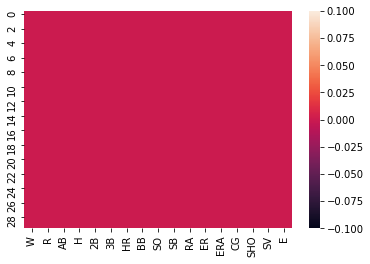

In [175]:
# Checking null values with heatmap:
sns.heatmap(df.isnull())

There is no null valuespresent in this dataset.

# EDA:

# Univariate Analysis:

# Checking the normal distribution of each column by distplot:

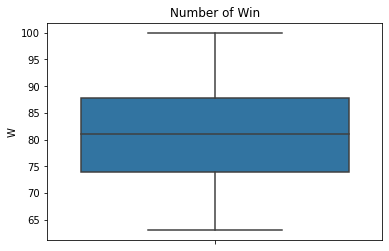

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64


In [176]:
plt.title('Number of Win')
sns.boxplot(y = df.W)
plt.show()
print(df.W.describe())

Min number of wins 63 and max is 100.

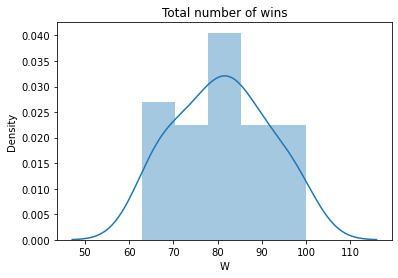

In [177]:
plt.title('Total number of wins')
sns.distplot(df.W)
plt.show()

- Total number of wins,W,the target column is normaly distributed.

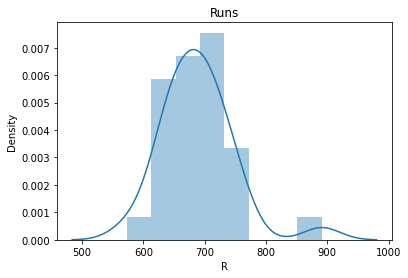

In [178]:
plt.title('Runs')
sns.distplot(df.R)
plt.show()

- Runs column is having little bit of Right skewness ,we will remove it latter.

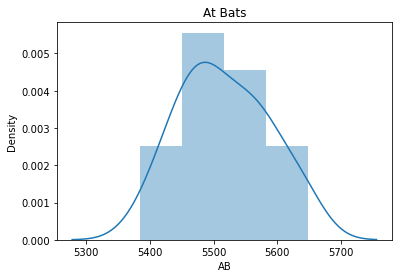

In [179]:
plt.title('At Bats')
sns.distplot(df.AB)
plt.show()

- This column At Bats  is showing normal distribution.

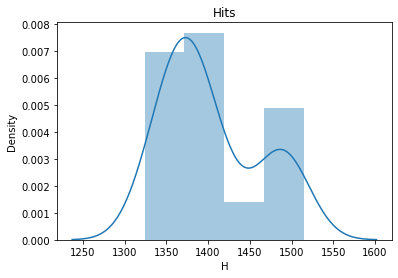

In [180]:
plt.title('Hits')
sns.distplot(df.H)
plt.show()

- Hits column is having Right skewness.

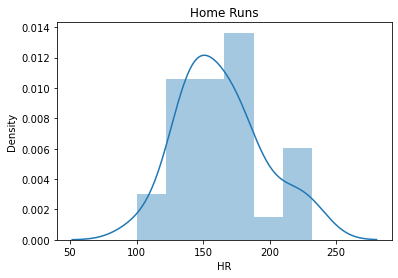

In [181]:
plt.title('Home Runs')
sns.distplot(df.HR)
plt.show()

- This column Home Runs is showing normal distribution.

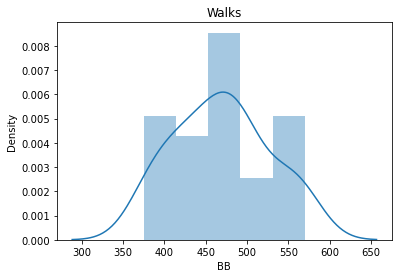

In [182]:
plt.title('Walks')
sns.distplot(df.BB)
plt.show()

- This column Walks is showing normal distribution.

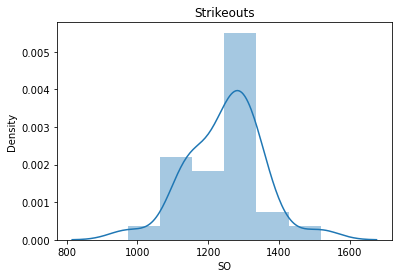

In [183]:
plt.title('Strikeouts')
sns.distplot(df.SO)
plt.show()

- This column Strikeouts is showing somehow in normal distribution.

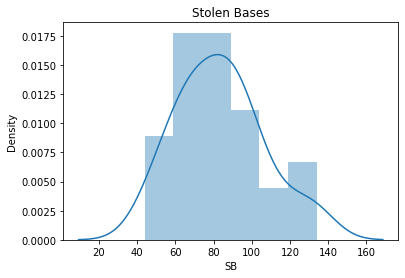

In [184]:
plt.title('Stolen Bases')
sns.distplot(df.SB)
plt.show()

- This column Stolen Bases is showing normal distribution.

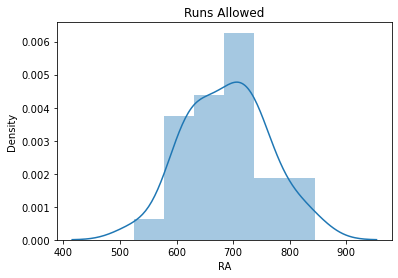

In [185]:
plt.title('Runs Allowed')
sns.distplot(df.RA)
plt.show()

- This column Runs Allowed is showing normal distribution.

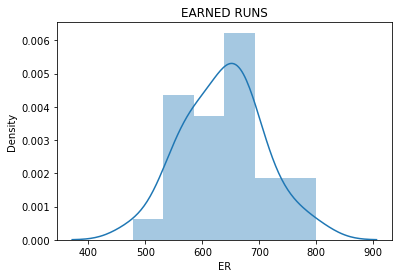

In [186]:
plt.title('EARNED RUNS')
sns.distplot(df.ER)
plt.show()

- This column Earned Runs is showing normal distribution.

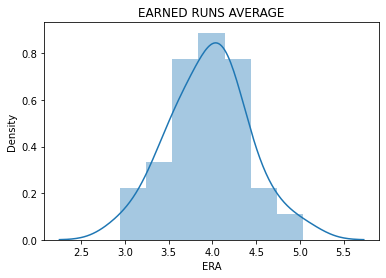

In [187]:
plt.title('EARNED RUNS AVERAGE')
sns.distplot(df.ERA)
plt.show()

- This column Earned Runs Average is showing normal distribution.

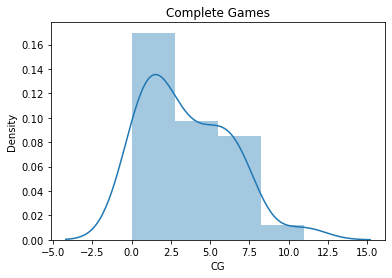

In [188]:
plt.title('Complete Games')
sns.distplot(df.CG)
plt.show()

- This column Complete Games Average is showing somehow normal distribution.

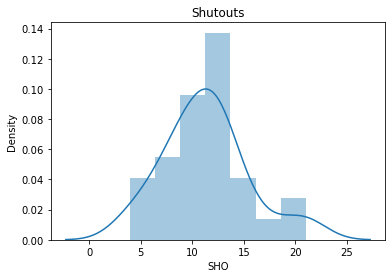

In [189]:
plt.title('Shutouts')
sns.distplot(df.SHO)
plt.show()

- This column Shutouts Average is showing normal distribution.

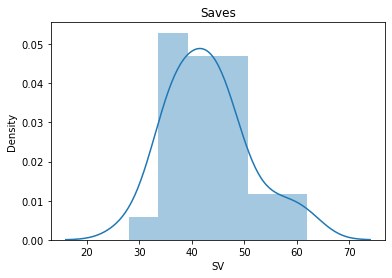

In [190]:
plt.title('Saves')
sns.distplot(df.SV)
plt.show()

- This column Saves is showing normal distribution.

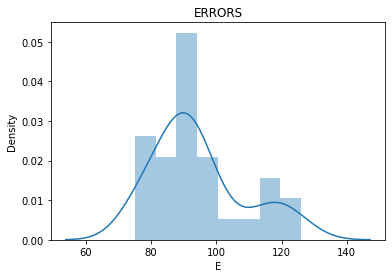

In [191]:
plt.title('ERRORS')
sns.distplot(df.E)
plt.show()

- This column Errors is showing little bit of Right Skewness.we will remove the skewness latter.

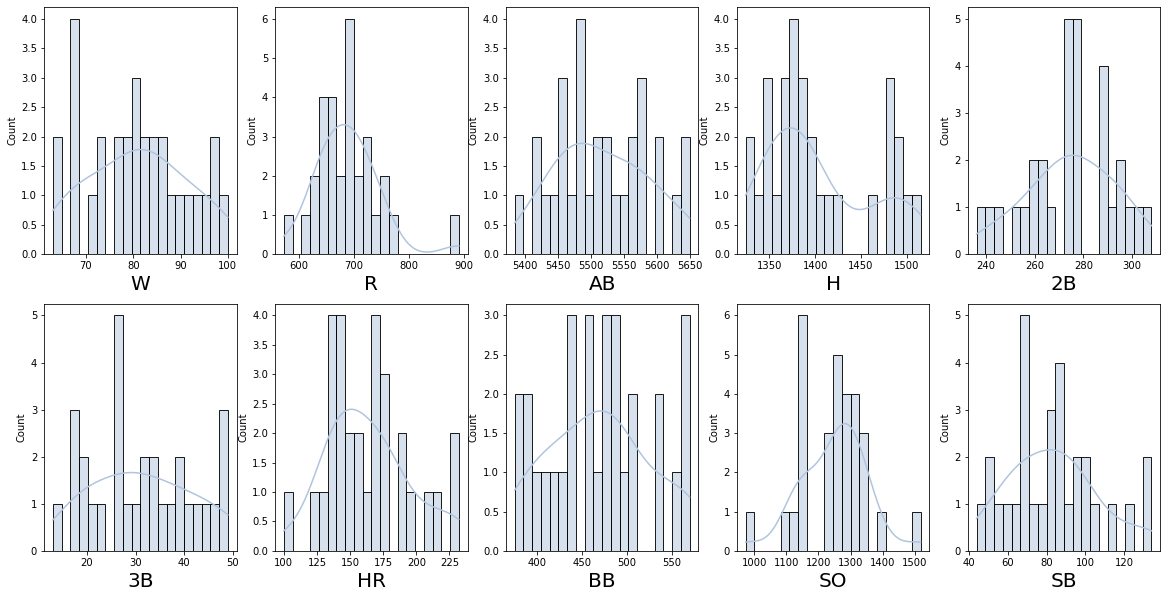

In [192]:
# Checking the normal distribution
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(df[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


- Each observation is written above while univariate analysis.

# - Bi variate Analysis:

# Checking the columns with the line plot:

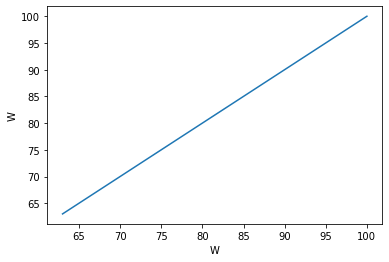

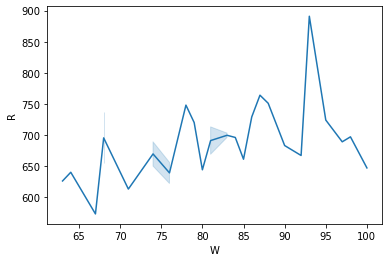

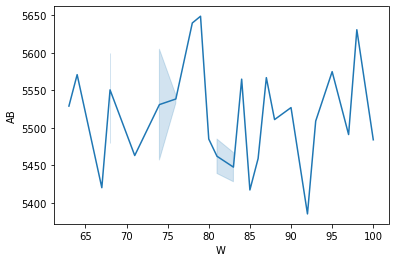

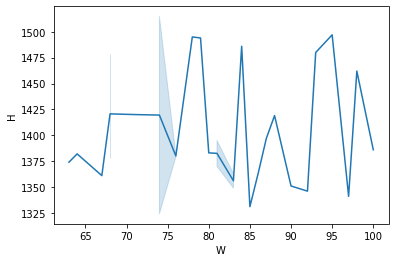

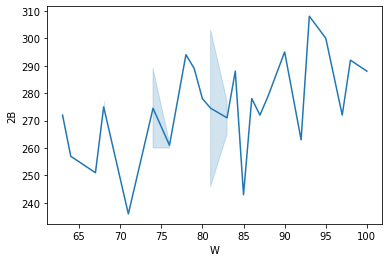

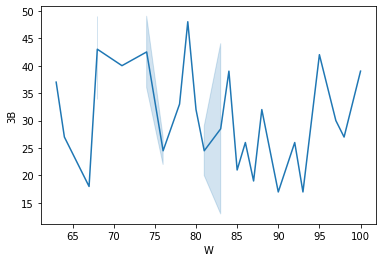

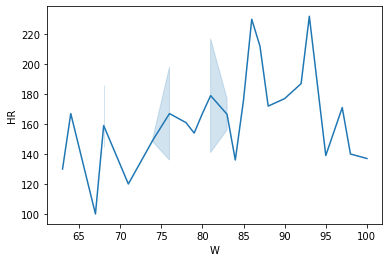

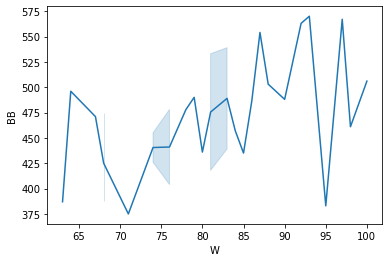

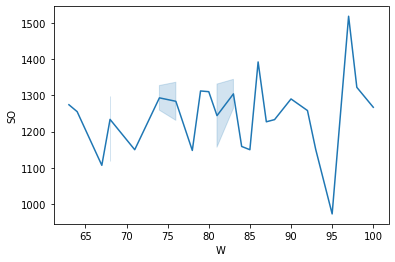

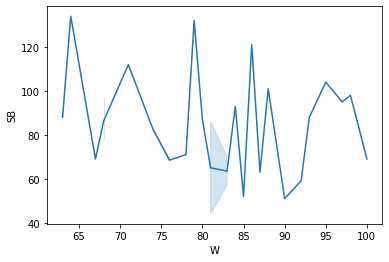

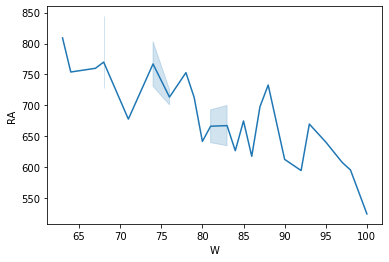

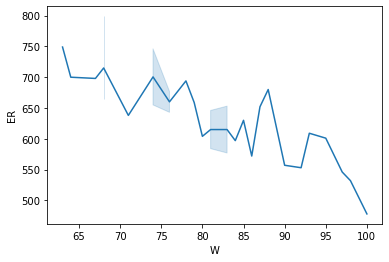

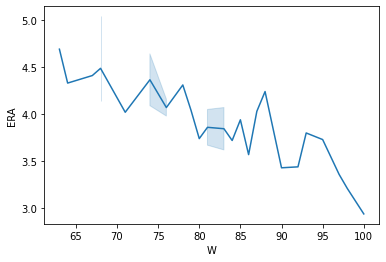

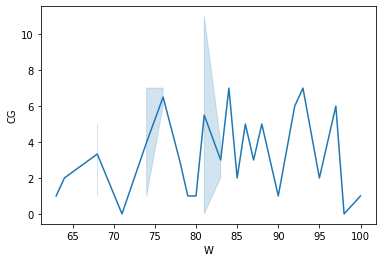

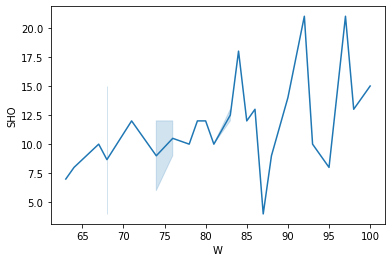

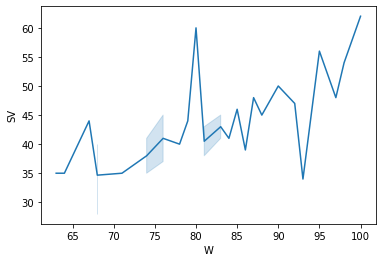

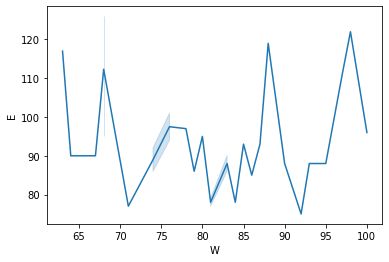

In [193]:
for i in df.columns:
    sns.lineplot(x='W',y=i,data=df)
    plt.show()

- From above line polts we can conclude that number of win increases with the decrease in Runs Allowed(RA),Earned Runs(ER) and Earned Run Average (ERA).

- Chances of win increases with the increae in Walks(BB), Shutouts(SHO) and Saves(SV).

# Let's study this with scatter plot:

<AxesSubplot:xlabel='W', ylabel='SV'>

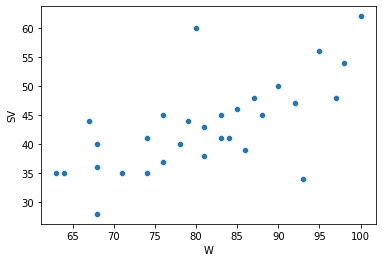

In [194]:
sns.scatterplot(x='W',y='SV',data=df)

- We can see that number of Saves increases the chance of Win.

<AxesSubplot:xlabel='RA', ylabel='W'>

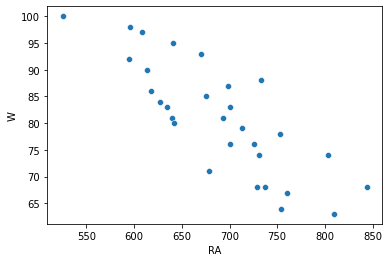

In [195]:
sns.scatterplot(x='RA',y='W',data=df)

- More runs allowed will decrease the chances of winning.

<AxesSubplot:xlabel='HR', ylabel='W'>

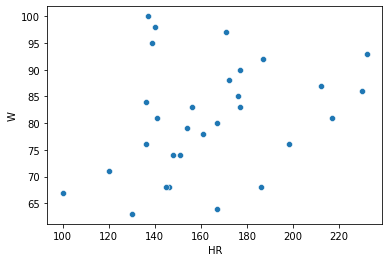

In [196]:
sns.scatterplot(x='HR',y='W',data=df)

- Home Run does have minor impact in winning most number of matches.

<AxesSubplot:xlabel='2B', ylabel='W'>

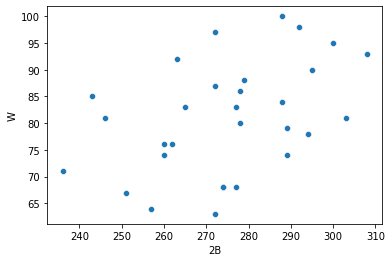

In [197]:
sns.scatterplot(x='2B',y='W',data=df)

- Scoring huigh number of doubles can improve the chances of winning.

<AxesSubplot:xlabel='3B', ylabel='W'>

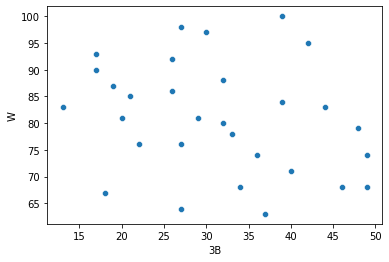

In [198]:
sns.scatterplot(x='3B',y='W',data=df)

- 3B has no coreralion in winning the number of matches.

# Now checking the features with seaborn lmplot:

<Figure size 1440x360 with 0 Axes>

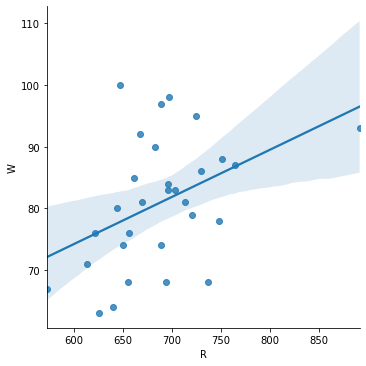

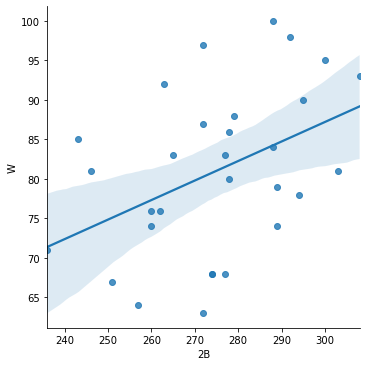

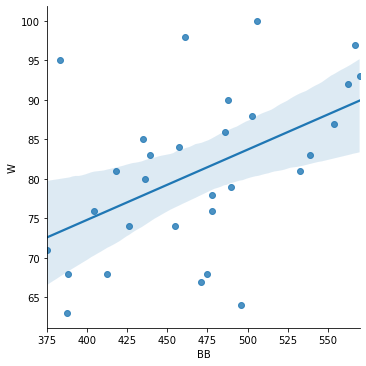

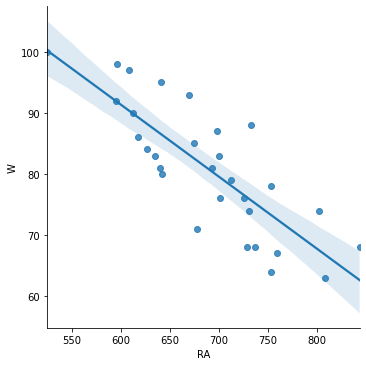

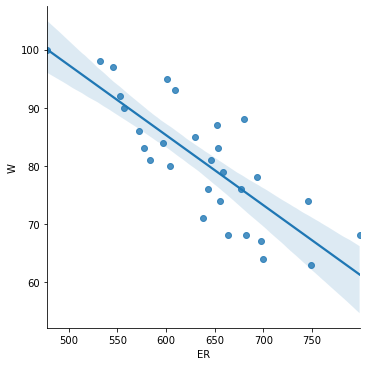

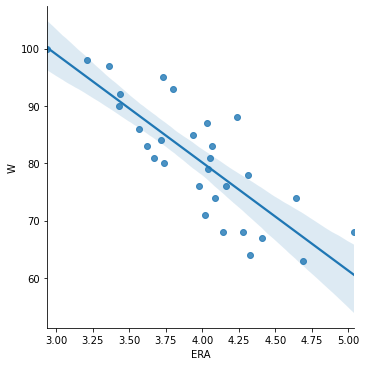

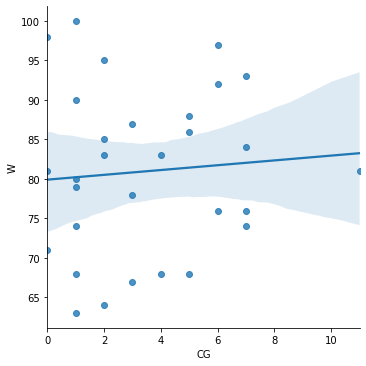

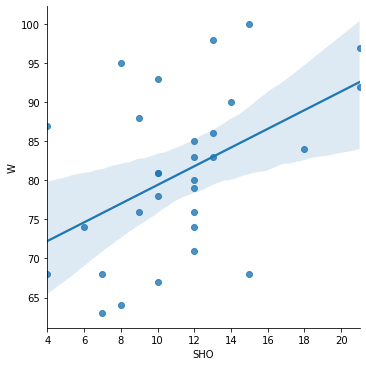

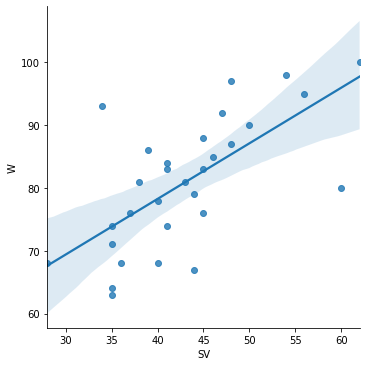

In [199]:
plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='R', y='W', fit_reg=True)
sns.lmplot(data=df, x='2B', y='W', fit_reg=True)
sns.lmplot(data=df, x='BB', y='W', fit_reg=True)
sns.lmplot(data=df, x='RA', y='W', fit_reg=True)
sns.lmplot(data=df, x='ER', y='W', fit_reg=True)
sns.lmplot(data=df, x='ERA', y='W', fit_reg=True)
sns.lmplot(data=df, x='CG', y='W', fit_reg=True)
sns.lmplot(data=df, x='SHO', y='W', fit_reg=True)
sns.lmplot(data=df, x='SV', y='W', fit_reg=True)

- The no of runs increases the chance of winning.
- The no of doubles increases the chance of winning.
- the no of walks increases the chance of winning.
- The no of Runs allowed decreases the chance of winning.

# Let's check for outliers :

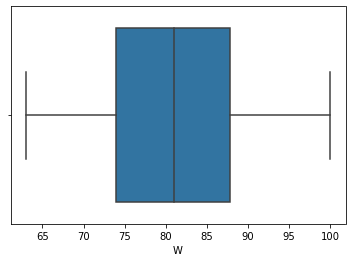

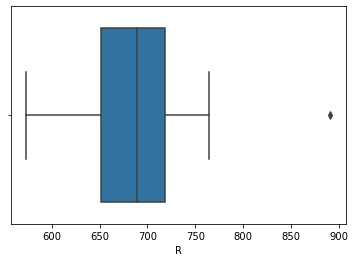

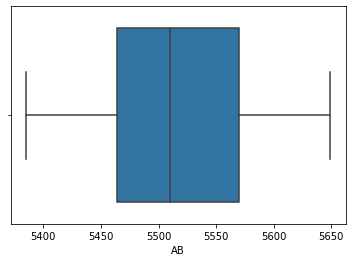

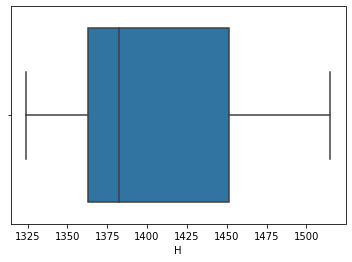

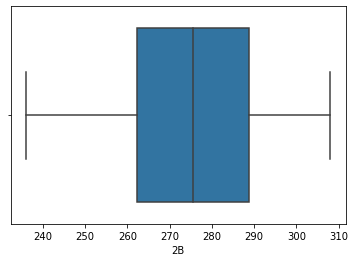

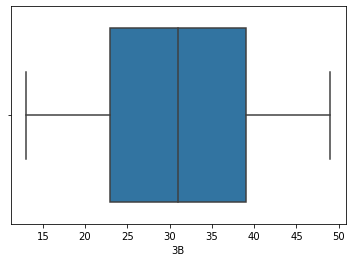

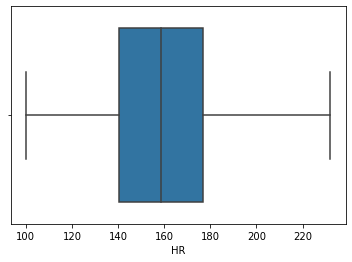

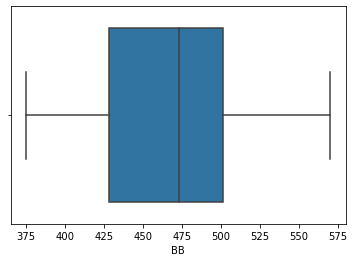

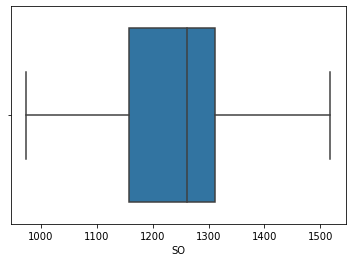

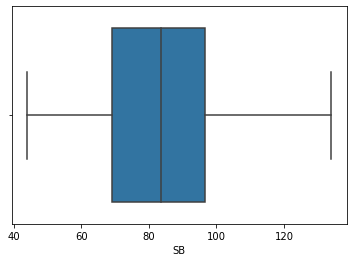

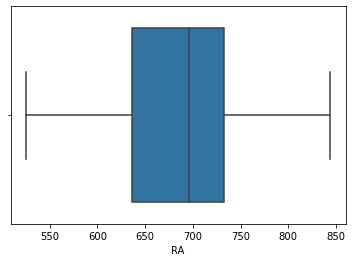

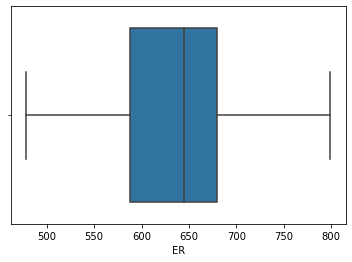

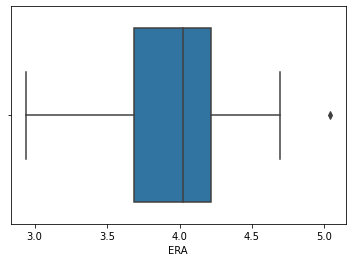

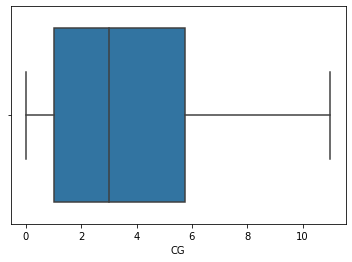

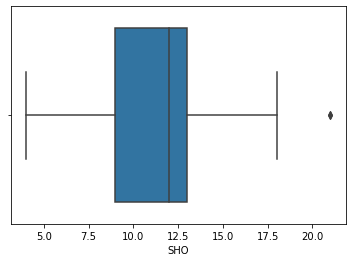

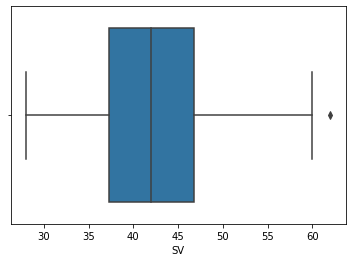

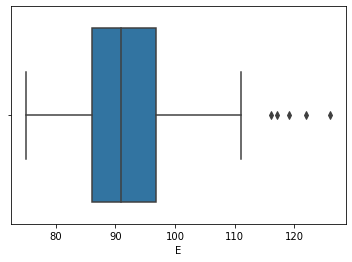

In [200]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

- There are outliers in R and few outliers in E. Hence there are not much outliers present in the dataset. Since our dataset is small we will not remove them

In [201]:
#Checking for outliers in R:

In [202]:
df[df['R']>850]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


- As we can see as there is only 1 team that has scored more than 891 runs.

In [203]:
#Checking for outliers in E:

In [204]:
df[df['E']>120]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122


- Here also hardly any data above 120 so we will keep the outliers.

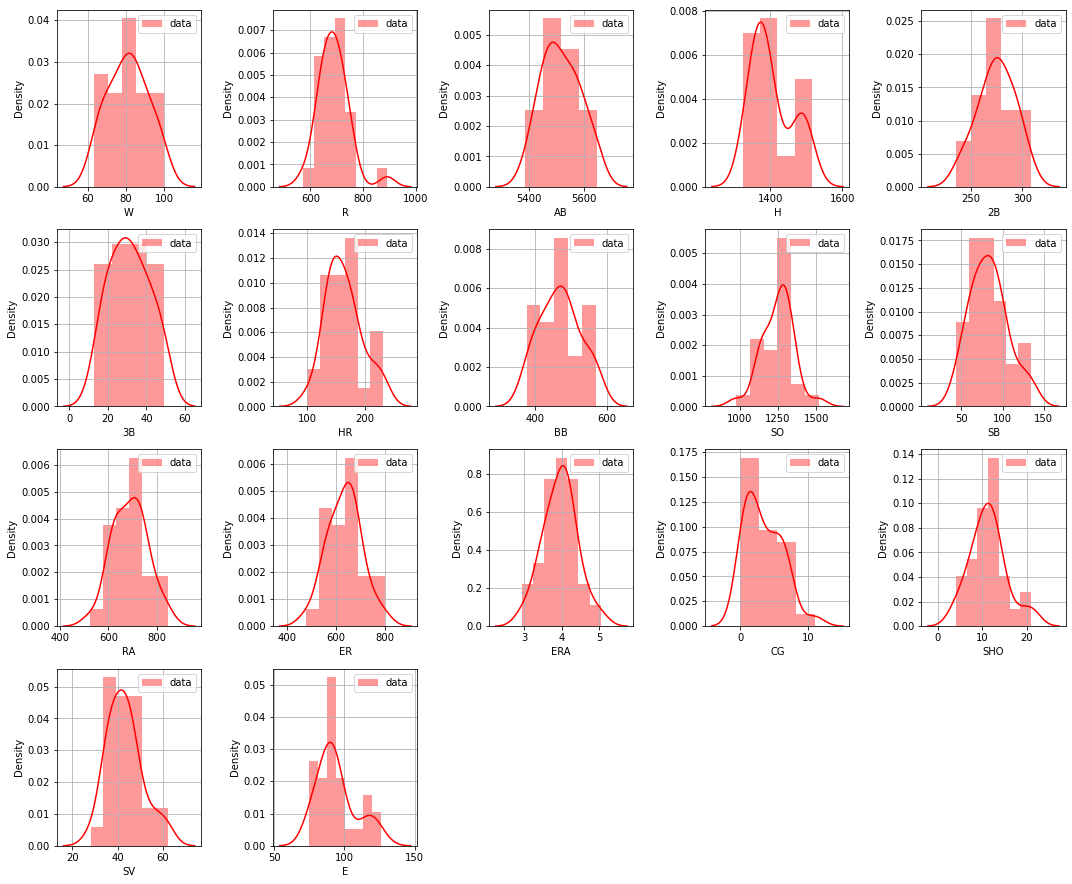

In [205]:
#Again checking normal distribution:
plt.figure(figsize=(15,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- The observation is discussed earlier.

In [206]:
# checking Multi colinearity:
dfcor = df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

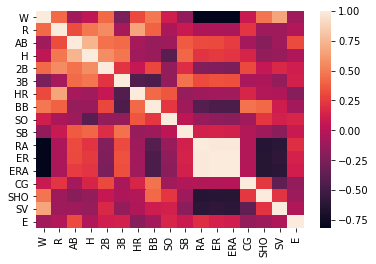

In [207]:
sns.heatmap(dfcor)

<AxesSubplot:>

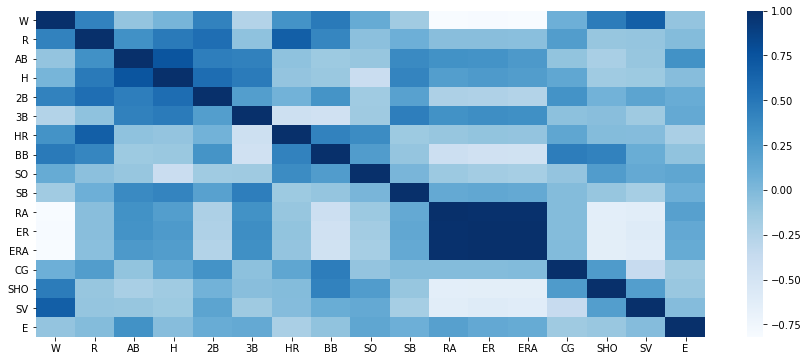

In [208]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

<AxesSubplot:>

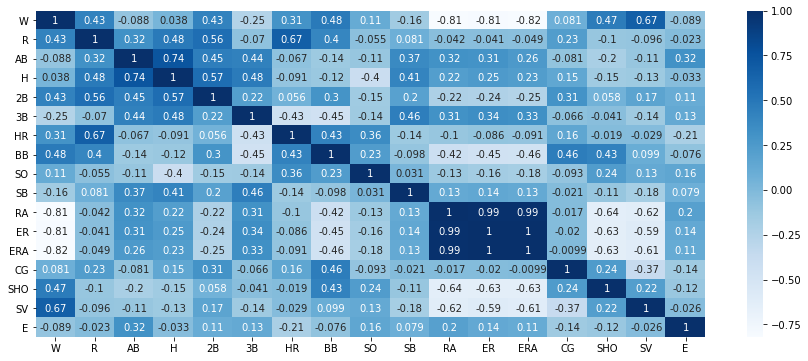

In [209]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

- most of the column is negatively co-related to each other.
- win and saves have the highest co-relation with 0.67.
- win and Era have the lowest co-relation of -0.82.

In [210]:
#Lets remove the outliers with Z-Score:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


- lost one row after removing the outliers with Z-score.

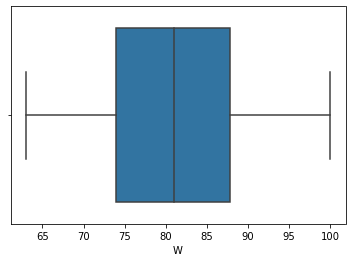

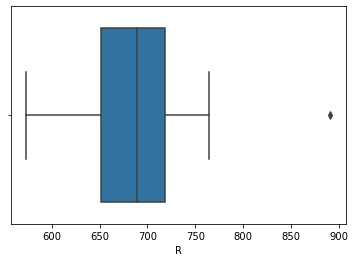

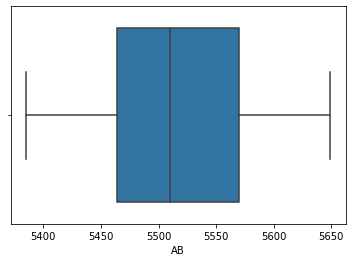

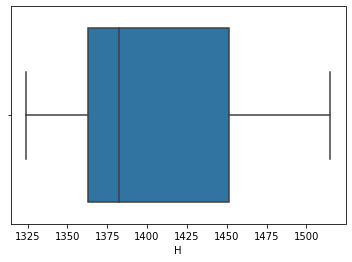

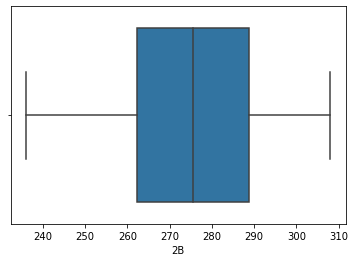

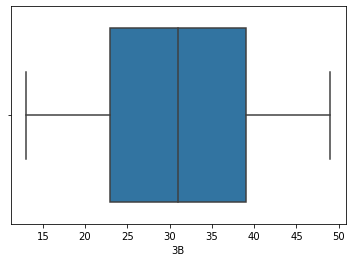

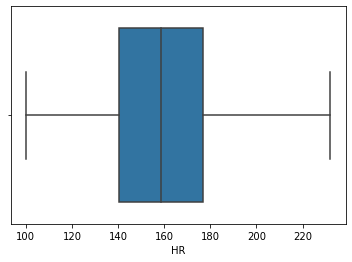

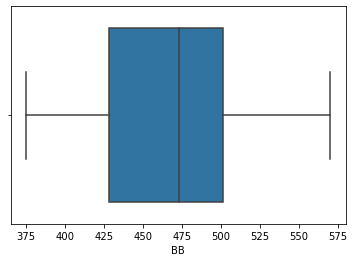

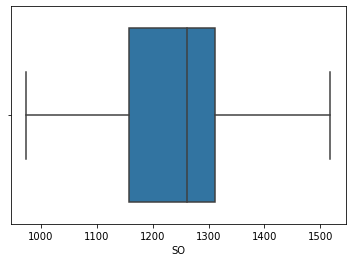

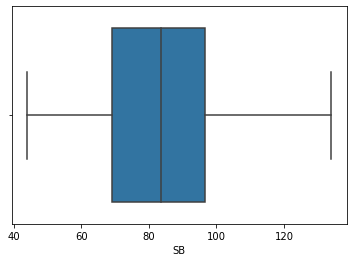

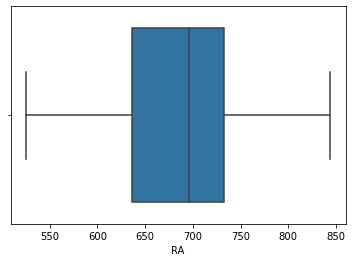

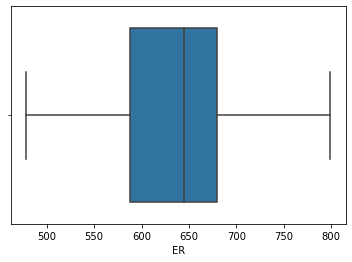

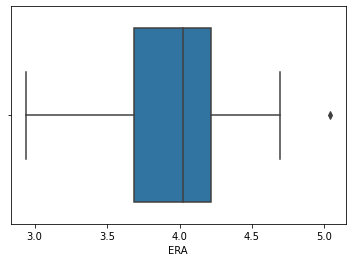

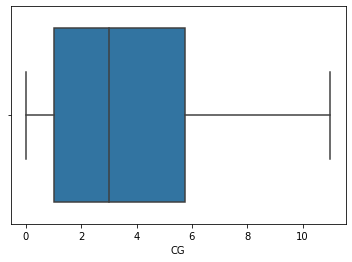

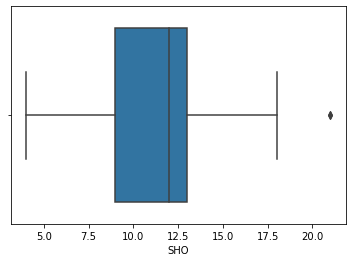

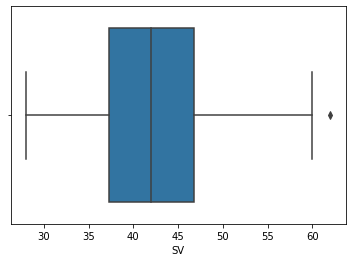

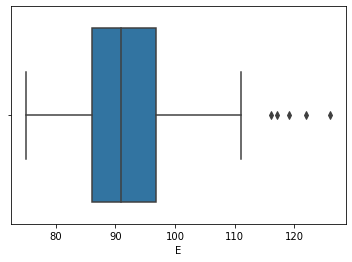

In [211]:
#Lets check the outlier again after removing it with z-score
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

- There are still outliers in the dataset,we cant loose data anymore,so we will not remove data further other than reducing skewness.

# Checking the skewness:

In [212]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- There is skewness in R,H,CG,SV and E.

In [213]:
# Reducing skewness with log transform:
for i in df.columns:
    if df[i].skew()>0.50:
        df[i]=np.log1p(df[i])

In [214]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

- There is still little bit of skewness which is negligible.

# Checking skewness Randomly:

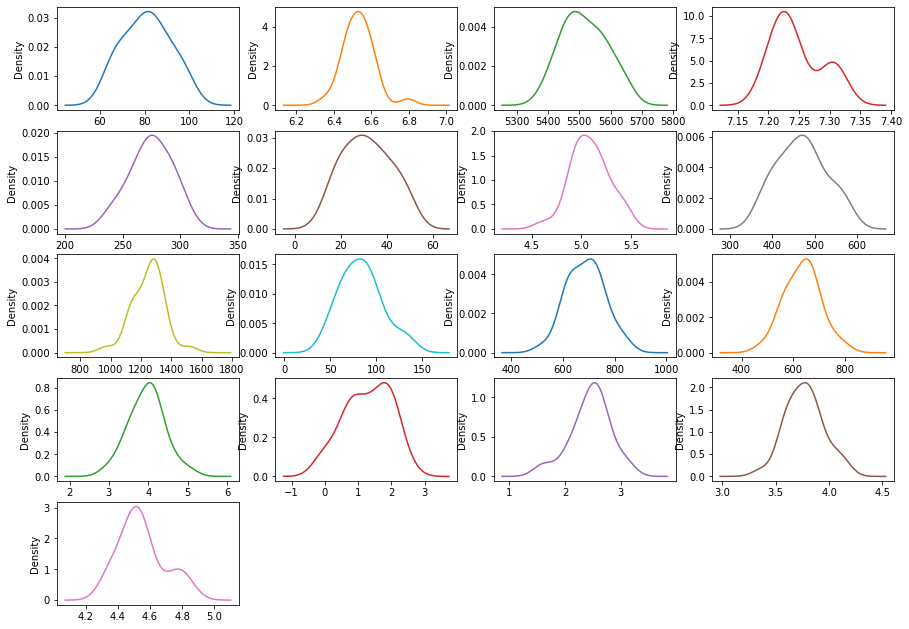

In [215]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=False, figsize=(15,11))
plt.show()

- There is still little bit of skewness which is negligible.

In [216]:
df.drop(['ERA'], axis=1, inplace=True)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,4.941642,383,973,104,641,601,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,5.056246,439,1264,70,700,653,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,4.955827,533,1157,86,640,584,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,4.919981,404,1231,68,701,643,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,5.023881,455,1259,83,803,746,2.079442,2.564949,3.583519,4.465908
5,93,6.793466,5509,7.300473,308,17,5.451038,570,1151,88,670,609,2.079442,2.397895,3.555348,4.488636
6,87,6.639876,5567,7.242798,272,19,5.361292,554,1227,63,698,652,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,5.384495,418,1331,44,693,646,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,5.123964,436,1310,87,642,604,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,5.087596,478,1148,71,753,694,1.386294,2.397895,3.713572,4.584967


# Dividing the dataset into features and label:

In [217]:
x=df.drop(['W'],axis=1)
y=df['W']
y=pd.DataFrame(data=y)

# Standardization:-

In [218]:
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [219]:
sc_x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.278921,-0.729108,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,-0.278921,0.322638,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,1.762778,-0.155160,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,1.165619,-0.427761,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.165619,0.322638,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,1.165619,-0.155160,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.144769,-2.410262,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,-1.896930,-0.155160,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.876080,0.322638,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.144769,-0.155160,-0.332028,0.270716


In [220]:
x=sc_x
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,0.665329,0.847731,1.649382,1.420173,1.041193,-0.763978,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.278921,-0.729108,1.581273,-0.427060
1,0.179562,-0.711094,-0.981656,0.127403,1.235809,-0.157077,-0.536592,0.154878,-0.601826,0.165971,0.248930,-0.278921,0.322638,0.336185,-0.591693
2,-0.307704,-1.115233,-0.134210,1.588795,-0.223808,-0.688861,1.139144,-0.893982,0.111449,-0.680339,-0.751623,1.762778,-0.155160,-0.622441,-1.199289
3,-1.204730,0.241522,-0.389136,-0.828122,-0.418423,-0.878690,-1.160536,-0.168602,-0.690985,0.180076,0.103922,1.165619,-0.427761,-0.773282,0.560495
4,0.055070,1.280738,1.951480,0.801892,1.722347,-0.328473,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.165619,0.322638,-1.087253,-0.591693
5,3.221983,-0.104884,1.360715,1.869832,-1.391501,1.933613,1.798742,-0.952796,0.200609,-0.257184,-0.389104,1.165619,-0.155160,-1.250843,-0.427060
6,1.327687,0.732263,-0.098001,-0.153633,-1.196885,1.458347,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.144769,-2.410262,0.703068,-0.031141
7,0.476767,-0.451289,-0.591253,-1.615025,-1.099578,1.581221,-0.910958,0.811641,-1.760897,0.067235,0.147424,-1.896930,-0.155160,0.078051,-1.382679
8,-0.776713,-0.451289,-0.352560,0.183611,0.068115,0.201536,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.876080,0.322638,1.975123,0.121359
9,1.066997,1.785913,1.615591,1.082929,0.165423,0.008945,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.144769,-0.155160,-0.332028,0.270716


# Creating Models:

In [221]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.9620509937681392
At random state 0,the testing accuracy is: 0.10796218494079635


At random state 1,the training accuracy is: 0.9663112202723293
At random state 1,the testing accuracy is: 0.683248706262468


At random state 2,the training accuracy is: 0.9775018784224357
At random state 2,the testing accuracy is: 0.19154948089408008


At random state 3,the training accuracy is: 0.9618541094254129
At random state 3,the testing accuracy is: 0.582334406019478


At random state 4,the training accuracy is: 0.9606022923886325
At random state 4,the testing accuracy is: 0.5785181460098066


At random state 5,the training accuracy is: 0.942521530168457
At random state 5,the testing accuracy is: 0.9021448433881136


At random state 6,the training accuracy is: 0.947170534789328
At random state 6,the testing accuracy is: 0.7745681449983224


At random state 7,the training accuracy is: 0.9475774274197492
At random state 7,the testing accuracy is: 0.55420

At random state 64,the testing accuracy is: 0.7958417417289996


At random state 65,the training accuracy is: 0.9413103917849993
At random state 65,the testing accuracy is: 0.8327732542799914


At random state 66,the training accuracy is: 0.9825758747404875
At random state 66,the testing accuracy is: 0.11191073777014626


At random state 67,the training accuracy is: 0.9501928327769482
At random state 67,the testing accuracy is: 0.7672473014865472


At random state 68,the training accuracy is: 0.9386556580118482
At random state 68,the testing accuracy is: 0.8299964539966567


At random state 69,the training accuracy is: 0.9570282309718304
At random state 69,the testing accuracy is: 0.8163052836285984


At random state 70,the training accuracy is: 0.9582051689724851
At random state 70,the testing accuracy is: 0.13798460285731162


At random state 71,the training accuracy is: 0.9622461377584484
At random state 71,the testing accuracy is: 0.28961984283096576


At random state 72,the traini

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=39)

# Suppor Vector Regressor:

In [223]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8946209103408633
0.4410395727691172
0.23792220003021103


In [224]:
# Creating all the models at a time:

In [225]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
ls=Lasso()
rd=Ridge()
xg = XGBRegressor()

model=[lr,sv,dt,rf,kn,ab,ls,rd,xg]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','Lasso','Ridge','XGB'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.948980,0.809914,20.972839,0.394958
1,SupportVector,0.894621,0.859418,15.510866,0.454915
2,DecisionTree,1.000000,0.359517,70.666667,-0.637965
3,RandomForest,0.946660,0.397420,66.484617,0.245541
4,KNN,0.637847,0.395831,66.660000,0.340780
5,AdaBoost,0.986584,0.514174,53.602789,0.162207
6,Lasso,0.879328,0.813365,20.592024,0.668496
7,Ridge,0.930364,0.899867,11.048019,0.494200
8,XGB,1.000000,0.186892,89.712927,-0.175006


- We can see that Test score of Linear regression model is highest,thus we will be selecting as the final model for predicting the number of wins of the 2015 season.

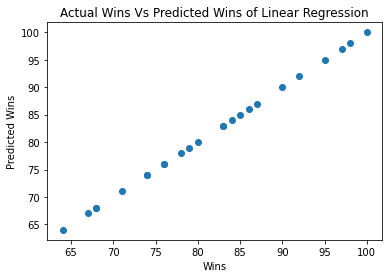

In [226]:
# Checking Actual Vs Predicted using Graph in Linear Regression:
plt.scatter(y_train,pred_train)
plt.xlabel('Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins Vs Predicted Wins of Linear Regression')
plt.show()

# Hyper Parameter tuning of Linear Regression with Ridge:

In [227]:
ls=Lasso()
parameters={'alpha':[10, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0],
            'max_iter':[1000,2000],
           'selection':['cyclic','random']}
lasso_regressor = GridSearchCV(estimator=ls,param_grid=parameters,cv=5) 
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [10, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,
                                   0.001, 0.0001, 0],
                         'max_iter': [1000, 2000],
                         'selection': ['cyclic', 'random']})

In [228]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1, 'max_iter': 1000, 'selection': 'random'}
0.7124743866744773


In [229]:
# model prediction using Linear Regression
x_predict = list(lr.predict(x_test))
lr_baseball = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(lr_baseball))

       predicted_values orignal_values
0  [55.251390895118384]           (W,)
1    [82.0270162748484]           (W,)
2   [83.90910352500816]           (W,)
3   [77.74234505008005]           (W,)
4   [67.06996621829104]           (W,)
5   [89.80948357024103]           (W,)


In [44]:
#import joblib
#Saving the model
import joblib

joblib.dump(lr,'lr_baseball.obj')

['lr_baseball.obj']

In [45]:
#Testing the saved model
lr_from_joblib=joblib.load('lr_baseball.obj')
lr_from_joblib.predict(x_test)

array([[57.35530578],
       [84.31203357],
       [80.86962477],
       [80.28327233],
       [69.33425423],
       [93.79382246]])

# Conclusion:

we are given the 2014 season data of a baseball team to predict the winning situations of 2015 season.There are many factors given to predict the wins.we have done uni,bi,multivariate analysis to get into deep to find that most of the features are not co-related.we didnt remove any data because we didnt want to loose enough amount of data.After creating the models we find that Linear regression is giving the highest test score,so we chose linear regression as the best model and save it.Now it will be much more easier to predict the next season winning prediction for any teams.